<a href="https://colab.research.google.com/github/asgutierrt/Introduction_to_IA/blob/main/unsupervised/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# run ONCE (only in Colab)
#!git clone https://github.com/asgutierrt/Introduction_to_IA.git
#curr_path="/content/Introduction_to_IA/unsupervised/src"

In [2]:
from pathlib import Path
import os
from os.path import join
import plotly.io as pio

# to import from src folder
try:
    os.chdir(curr_path)
    # custom visualization: colab only
    pio.renderers.default='colab'
except:
    os.chdir(join(Path().absolute().parent,'src'))
    pio.renderers.default='vscode' # other renderers: 'browser', 'jupyterlab', 'notebook'


from modules.load_data import load_data
from modules.distances import plot_distances, get_distance_matrix, covarianza_inversa
from modules.cluster_algorithms import cluster_pipeline, naive_boxes, naive, naive_kn
from modules.support_functions import encode_array


filename='water_potability.txt'
filename='iris'

# store info on report folder
fig_path= join('..','reports','figures')
results_path= join('..','reports','group_matrix')
filepath = join('..','data',filename)

exploration of data:

1. number of ocurrences of each class: check for imbalanced data
0.0    50
1.0    50
2.0    50

2. basic statistics on the data: check scales of the values and nan value count

          sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)    target
count                 150.0            150.0             150.0            150.0     150.0
mean               5.843333         3.057333             3.758         1.199333       1.0
std                0.828066         0.435866          1.765298         0.762238  0.819232
min                     4.3              2.0               1.0              0.1       0.0
25%                     5.1              2.8               1.6              0.3       0.0
50%                     5.8              3.0              4.35              1.3       1.0
75%                     6.4              3.3               5.1              1.8       2.0
max                     7.9              4.4               6.9              2.5  

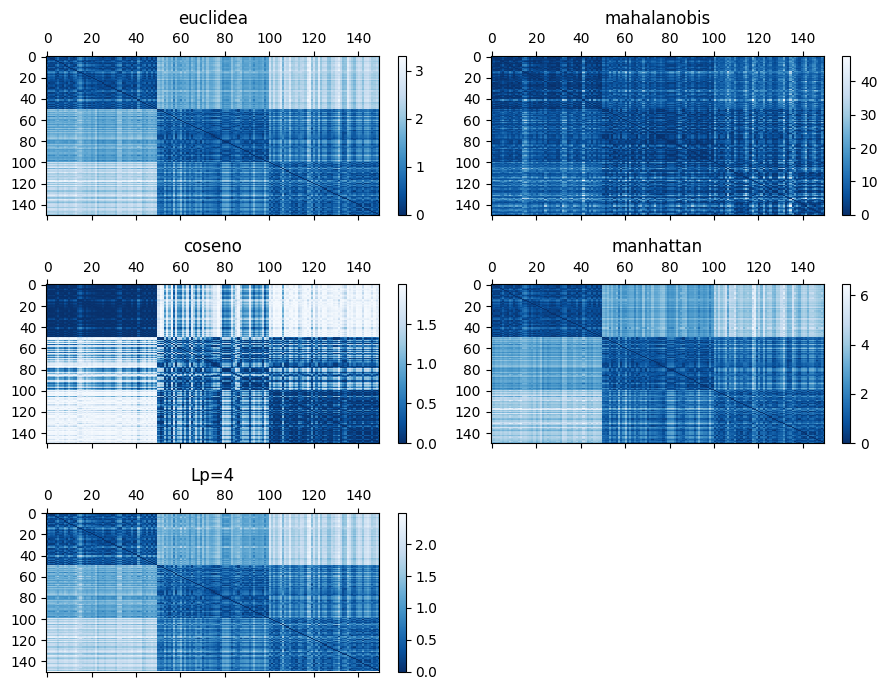

In [3]:
# load data
X, _ = load_data(filepath)
cov_i = covarianza_inversa(X)

# calculate and plot distances
normas=['euclidea','mahalanobis','coseno','manhattan','Lp=4']
D = get_distance_matrix(X,X,cov_i,norms=normas)
plot_distances(D,normas,join(fig_path,'distances_XX.png'))

In [4]:
plot_dims=[0,1,2]
norma_i=0

In [5]:
# fully naive
n_groups=3
x_ref=130
cluster_pipeline(X, D[norma_i], naive, results_path, fig_path, 
                plot_dims, 'naive_norm_%s'%normas[norma_i], n_groups=n_groups, x_ref=x_ref)

In [5]:
# 1. naive clustering: boxes
n_groups=3
fig = cluster_pipeline(X, D[norma_i], naive_boxes, results_path, fig_path, 
                    plot_dims, 'boxes_norm_%s'%normas[norma_i], n_groups=n_groups)
fig.show()

In [5]:
# 2. naive clustering: k-nearest neighbors
k_n=50
cluster_pipeline(X, D[norma_i], naive_kn, results_path, fig_path, 
                plot_dims, 'kn_norm_%s'%normas[norma_i], k_n=k_n)
fig.show()